# Dataframes

Elements of Data Science

by [Allen Downey](https://allendowney.com)

[MIT License](https://opensource.org/licenses/MIT)

### Goals

This notebook introduces Pandas, which is a powerful library for working with data.  Pandas provides functions for reading data from files, and it provides two new types for working with data, DataFrames and Series.

We'll use these tools to estimate the average birth weight of babies in the U.S.  This example demonstrates the important steps in almost any data science project:

1. Identifying data that can answer a question.

2. Obtaining the data and loading it in Python.

3. Checking the data and dealing with errors.

4. Selecting the relevant subsets from the data.

5. Using histograms to visualize a distribution of values.

6. Using summary statistics to describe the data in a way that best answers the question.

7. Considering possible sources of error and limitations in our conclusions.

Because this notebook presents a data science project from end to end, it is a little longer than some of the previous notebooks.  So, hang in there!

----

# Dataframes 

數據科學的要素

作者： 艾倫唐尼

麻省理工學院執照

### Goals

該筆記本介紹了Pandas，Pandas是用於處理數據的強大庫。Pandas提供了從文件讀取數據的功能，並提供了兩種用於處理數據的新類型：DataFrame和Series。

我們將使用這些工具來估算美國嬰兒的平均出生體重。該示例演示了幾乎所有數據科學項目中的重要步驟：

1. 識別可以回答問題的數據。
1. 獲取數據並將其加載到Python中。
1. 檢查數據並處理錯誤。
1. 從數據中選擇相關子集。
1. 使用直方圖可視化值的分佈。
1. 使用摘要統計信息以最能回答問題的方式描述數據。
1. 在我們的結論中考慮可能的錯誤來源和局限性。

由於此筆記本從頭到尾都提供了一個數據科學項目，因此它比以前的某些筆記本要長一些。所以，掛在那裡！

# DataFrames and Series

The fundamental goal of data science is to use data to answer questions and guide decision making.

As an example, we'll start with a simple question: what is the average birth weight of babies in the United States?

To answer a question like this, we have to find an appropriate dataset or run an experiment to collect it.  Then we have to get the data into our development environment and prepare it for analysis, which involves cleaning and validation.

For this question we'll use data from the [National Survey of Family Growth](https://www.cdc.gov/nchs/nsfg/index.htm), which is available from the National Center for Health Statistics.

Their 2013-2015 dataset includes information about a sample of women in the U.S. and their children.  

The Python library we'll use to read and analyze data is Pandas, which we'll import as `pd`.

----

# 數據框　和　系列


數據科學的基本目標是使用 `數據` `回答問題` 並 `指導決策`。

例如，我們將從一個簡單的問題開始：


- 在美國，嬰兒的【平均出生體重】是多少？


為了回答這樣的問題，我們必須找到合適的數據集或進行實驗以收集它。然後，我們必須將數據放入我們的開發環境中，並準備進行分析，其中涉及清理和驗證。

對於這個問題，我們將使用國家健康統計中心提供的國家家庭成長調查數據。

他們的2013-2015年數據集包含有關美國女性及其子女的樣本信息。

我們將用於讀取和分析數據的Python庫是Pandas，我們將其導入為pd。


In [1]:
import pandas as pd

Pandas can read data in most common formats, including CSV, Excel, and the format the NSFG data is in, HDF5.  [You can read about HDF here](https://en.wikipedia.org/wiki/Hierarchical_Data_Format).

----

熊貓可以讀取最常見的格式的數據，包括CSV，Excel和NSFG數據所使用的格式HDF5。 您可以在此處閱讀有關HDF的信息。


In [2]:
import os

if not os.path.exists('nsfg.hdf5'):
    !wget https://github.com/AllenDowney/ElementsOfDataScience/raw/master/nsfg.hdf5

In [3]:
nsfg = pd.read_hdf('nsfg.hdf5')
type(nsfg)

pandas.core.frame.DataFrame

The result from `read_hdf()` is a DataFrame, which is the primary type Pandas uses to store data.

For each woman who participated in the survey, this DataFrame has one row for each pregnancy and one column for each survey question.

DataFrame has a method called `head()` that shows the first 5 rows:

----

結果來自read_hdf()一個DataFrame，這是Pandas用於存儲數據的主要類型。

對於每個參與調查的女性，此DataFrame每次懷孕都有一行，而每個調查問題都有一欄。

DataFrame有一個名為的方法head()，它顯示前5行：

----

### 【ry註解】: 

這整篇的翻譯中，　
凡是　row 都翻譯為【行】，
凡是　column 都翻譯為　【列】。
這恰好與台灣學生高中數學的習慣相反，請注意一下！！

事實上
row, column = 【行】【列】，
日本與中國這兩個使用漢字的大國皆是如此翻譯。

[/]:# (
    唯獨台灣【在國民黨主政的年代】，刻意要【仇日】及【反共】，
    因此刻意與他們兩國的漢字用法不同，為反對而反對所造成的結果。
    使得台灣的學生今日在看wikipedia 或使用　google 翻譯時，
    會得到混淆的結果。)

----

### 「m-by-n matrix」的各地常用別名

- 中國	m行　n列　矩陣
- 日本	m行　n列　矩陣
- 臺灣	m列　n行　矩陣

----

行列
出典: フリー百科事典『ウィキペディア（Wikipedia）』

数学の線型代数学周辺分野における行列（ぎょうれつ、英: matrix）は、
数や記号や式などを縦と横に矩形状に配列したものである。

`横に並んだ一筋を行`、

`縦に並んだ一筋を列と呼ぶ`。

例えば、下記のような行列

$
{\displaystyle {\begin{bmatrix}1&9&-13\\20&5&-6\end{bmatrix}}}
$
は

`2つの行`と`3つの列`によって
構成されているため、
(2,3)型または
2×3型の行列と呼ばれる。



![image.png] (row_atGoogleTranslate.png)

![image.png] (column_atGoogleTranslate.png)


In [4]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,birthord,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,1.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,2.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,3.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,1.0,24.0,2903.782914


把　nsfg 存成　excel 或　任何　文書編輯器可讀的 .csv 檔案，
用　excel 把它打開瞧瞧。

In [5]:
# nsfg.to_csv('ryNsfg.csv')
# !dir *.csv

![ryNsfg.csv](ryNsfg.csv.png)



In [6]:
nsfg

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,birthord,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,1.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,2.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,3.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,1.0,24.0,2903.782914
...,...,...,...,...,...,...,...,...,...,...,...
9353,70615,1,4.0,11.0,35,1.0,1758,1825.0,2.0,22.0,8117.554461
9354,70616,1,8.0,7.0,42,1.0,1741,1816.0,1.0,18.0,6842.240477
9355,70616,1,7.0,6.0,36,1.0,2091,2158.0,2.0,23.0,6842.240477
9356,70619,1,8.0,3.0,41,1.0,3450,3525.0,1.0,31.0,3856.253532


DataFrames provide "attributes" and "methods".

A method is a function that is associated with a particular type.  For example, in a previous notebook, we used the `split` method, which is a function that works with strings.

An attribute is a variable associated with a particular type.  For example, DataFrame has an attribute called `shape`, which is the number of rows and columns:

----

DataFrames提供“屬性”和“方法”。

方法是與特定類型關聯的功能。例如，在以前的筆記本中，我們使用了該split方法，該方法適用於字符串。

屬性是與特定類型關聯的變量。例如，DataFrame有一個名為的屬性shape，它是行和列的數量：


In [7]:
nsfg.shape

(9358, 11)

There are 9358 rows in this dataset, one for each pregnancy, and 11 columns, one for each survey question.

DataFrame also has an attribute called `columns`, which contains the column names:

----

此數據集中有 9358　（橫）行，每位受訪者的每次懷孕的所有資料佔 1 行，
總共有　11（縱）列，每個調查問題所得之資料佔 1 列。

DataFrame 還有一個屬性　名為　`columns`，其中包含名稱：


In [8]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'birthord', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

The column names are stored in an `Index`, which is another Pandas type, similar to a list:

----

列名存儲在 `Index`，這是另一種 Pandas 類型，類似於 `list`：


In [9]:
type(nsfg.columns)

pandas.core.indexes.base.Index

Based on the column names, you might be able to guess what some of the variables are, but in general you have to read the documentation.

----

根據列名，您也許可以猜測一些變量所代表的含意，但是通常您必須詳細閱讀文檔本身。


**Exercise:** When you work with datasets like the NSFG, it is important to read the documentation carefully. If you interpret a variable incorrectly, you can generate nonsense results and never realize it. So, before we start looking at data, let's get familiar with the NSFG codebook, which describes every variable.

* Follow [this link](https://www.icpsr.umich.edu/icpsradmin/nsfg/index?studyNumber=9999) to get to the interactive codebook.

* Type "birthweight" in the search field, un-select the checkbox that says "Search variable name only", and press "Search".  You should see a list of variables related to birthweight.

* Click on "BIRTHWGT_LB1" and read the documentation of this variable. 

What is the most common value of this variable?

----
**練習**：

當使用諸如NSFG之類的數據集時，務必仔細閱讀文檔。如果錯誤地解釋了變量，則可能會產生無意義的結果，並且永遠不會意識到它。因此，在開始查看數據之前，讓我們熟悉描述每個變量的NSFG代碼簿。

單擊此[鏈接](https://www.icpsr.umich.edu/icpsradmin/nsfg/index?studyNumber=9999)以獲取交互式密碼本。

在搜索字段中輸入`birthweight`，取消選中 “僅搜索變量名稱” 的複選框，然後按 “搜索”。您應該看到與出生體重相關的變量列表。

單擊 `BIRTHWGT_LB1`，然後閱讀此變量的文檔。

這個變量最常見的值是什麼？



In [59]:
# Solution goes here
# nsfg.to_csv('ryNsfg.csv')

#X= nsfg['birthwgt_lb1']
#X.describe()

In [64]:
# 資料的全貌

nsfg

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,birthord,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,1.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,2.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,3.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,1.0,24.0,2903.782914
...,...,...,...,...,...,...,...,...,...,...,...
9353,70615,1,4.0,11.0,35,1.0,1758,1825.0,2.0,22.0,8117.554461
9354,70616,1,8.0,7.0,42,1.0,1741,1816.0,1.0,18.0,6842.240477
9355,70616,1,7.0,6.0,36,1.0,2091,2158.0,2.0,23.0,6842.240477
9356,70619,1,8.0,3.0,41,1.0,3450,3525.0,1.0,31.0,3856.253532


In [65]:
# 取出　birthwgt_lb1　欄位

X= nsfg['birthwgt_lb1']
X

0       5.0
1       4.0
2       5.0
3       NaN
4       8.0
       ... 
9353    4.0
9354    8.0
9355    7.0
9356    8.0
9357    8.0
Name: birthwgt_lb1, Length: 9358, dtype: float64

In [76]:
# 眾數，最常出現的資料值

X.mode() 

0    7.0
dtype: float64

In [73]:
# 其它　也很重要的統計參數

X.count(), X.sum(), X.mean(), X.median()

(6485, 52238.0, 8.055204317656129, 7.0)

In [74]:
# 一次把敘述統計的重要參數列出

X.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

### 【ry註解】

什麼啊！　max = 99 pounds ！ 巨嬰喔！！

 1 pound  = 0.45359237 kg
99 pounds = 44.9 kg !!!

In [77]:
99 * 0.45359237

44.905644630000005

## Series

In many ways a DataFrame is like a Python dictionary, where the column names are the keys and the columns are the values.  You can select a column from a DataFrame using the bracket operator, with a string as the key.

----
## 系列

在許多方面，DataFrame就像Python `字典(dict)` 一樣，
其中列名是 `鍵(key)`，而列的資料是`值(value)`。
您可以使用方括號運算符 `[]` 從DataFrame中選擇一 列，
並以`字符串`作為 鍵。


In [78]:
pounds= 磅數= nsfg['birthwgt_lb1']
type(pounds)

pandas.core.series.Series

The result is a Series, which is another Pandas type.  

In this case the Series contains the birth weights, in pounds, of the live births (or in the case of multiple births, the first baby).

----
結果是系列，這是另一種熊貓類型。

在這種情況下，系列包含活產的出生體重（以磅為單位）（如果是多胎，則是第一個嬰兒）。


`head()` shows the first five values in the series, the name of the series, and the datatype:

----
結果是系列，這是另一種熊貓類型。

在這種情況下，系列包含活產的出生體重（以磅為單位）（如果是多胎，則是第一個嬰兒）。

head() 顯示系列中的前五個值，系列名稱和數據類型：


In [14]:
pounds.head()

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

Remember that `head` is a method, not an attribute; to call it, we have to use parentheses, `()`.

`float64` means that these values are 64-bit floating-point numbers.

One of the values is `NaN`, which stands for "Not a Number".  NaN is a special value used to indicate invalid or missing data.  In this example, the pregnancy did not end in live birth, so birth weight is inapplicable.

----
請記住，這head是一種方法，而不是屬性。調用它，我們必須使用括號()。

float64 表示這些值為64位浮點數。

值之一是NaN，代表“不是數字”。NaN是一個特殊值，用於指示無效或丟失的數據。在此示例中，懷孕並沒有以活產結束，因此出生體重不適用。


**Exercise:**  The variable `birthwgt_oz1` contains the ounces part of birth weight.

- [Read the documentation of this variable](https://www.icpsr.umich.edu/icpsradmin/nsfg/variable/815971?studyNumber=9999).  What is the "universe" of this variable; that is, when is it applicable?

- Select the column `'birthwgt_oz1'` from the `nsfg` DataFrame and assign it to a new variable called `ounces`.

- Display the first 5 elements of `ounces`.

In [15]:
# Solution goes here

**Exercise:** The Pandas types we have seen so far at DataFrame, Index, and Series.  You can find the documentation of these types at:

* [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

* [Index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html)

* [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

For beginners, this documentation can be overwhelming.  I don't recommend trying to read it all now.  But you might want to skim it so you know where to look later.

For each type, the documentation lists the associated attributes (which are like variables) and methods (which are like functions).

----
練習： 該變量birthwgt_oz1包含出生體重的盎司部分。

閱讀此變量的文檔。這個變量的“宇宙”是什麼？也就是說，什麼時候適用？

'birthwgt_oz1'從nsfgDataFrame中選擇該列，並將其分配給名為的新變量ounces。

顯示的前5個元素ounces。


## Validation

At this point we have identified the columns we need to answer the question.  

* I'll select `birthwgt_lb1`, which contains the pound part of birth weight, and assign it to `pounds`.  

* And I'll select `birthwgt_oz1`, which contains the ounce part of birth weight, and assign it to `ounces`.

----

Validation 

至此，我們已經確定了我們需要回答的列。

我將選擇birthwgt_lb1，其中包含出生體重的磅部分，並將其分配給pounds。

然後，我選擇birthwgt_oz1，其中包含出生體重的盎司部分，並將其分配給ounces。

In [16]:
ounces = nsfg['birthwgt_oz1']
pounds = nsfg['birthwgt_lb1']

Before we do anything with this data, we have to validate it.  One part of validation is confirming that we are interpreting the data correctly.

We can use the `value_counts` method to see what values appear in `pounds` and how many times each value appears.

----
在對這些數據進行任何處理之前，我們必須對其進行驗證。驗證的一部分是確認我們正在正確解釋數據。

我們可以使用該value_counts方法查看出現在其中的值pounds以及每個值出現多少次。


In [17]:
pounds.value_counts()

7.0     2146
6.0     1666
8.0     1168
5.0      586
9.0      363
4.0      196
99.0      94
10.0      82
3.0       67
2.0       47
1.0       34
11.0      17
12.0       7
0.0        6
14.0       2
13.0       2
98.0       1
17.0       1
Name: birthwgt_lb1, dtype: int64

By default, the results are sorted with the most frequent value first, so I use `sort_index` to sort them by value instead, with the lightest babies first and heaviest babies last.

----
默認情況下，結果按最頻繁出現的值排在最前面，因此我使用sort_index按值排序，最輕的嬰兒排在最前，最重的嬰兒排在最後。


In [18]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

As we'd expect, the most frequent values are 6-8 pounds, but there are some very light babies, a few very heavy babies, and two special values, 98, and 99.  [According to the codebook](https://www.icpsr.umich.edu/icpsradmin/nsfg/variable/815970?studyNumber=9999), these values indicate that the respondent declined to answer the question (98) or did not know (99).

We can validate the results by comparing them to the codebook, which lists the values and their frequencies.  The results here agree with the codebook, so we have some confidence that we are reading and interpreting the data correctly.

----
正如我們所期望的，最常見的值是6-8磅，但是有一些非常輕便的嬰兒，一些非常重的嬰兒，以及兩個特殊值98和99。 根據密碼本，這些值表明受訪者拒絕回答問題（98）或不知道（99）。

我們可以通過將結果與代碼簿進行比較來驗證結果，代碼簿列出了值及其頻率。此處的結果與密碼本相符，因此我們可以確信自己正在正確讀取和解釋數據。

**Exercise:** In the `nsfg` DataFrame, the column `'outcome'` encodes the outcome of each pregnancy as shown below:

| Value | Meaning |
|---|---|
| 1  | Live birth |
| 2  | Induced abortion |
| 3  | Stillbirth | 
| 4  | Miscarriage |
| 5  | Ectopic pregnancy |
| 6  | Current pregnancy |

Use `value_counts` to display the values in this column and how many times each value appears.  Compare the results to the codebook, [which you can find here](https://www.icpsr.umich.edu/icpsradmin/nsfg/variable/816124?studyNumber=9999).  According to the codebook, how many live births are described in this dataset?  How many did you find in the DataFrame?

----

練習：在nsfgDataFrame中，該列'outcome'編碼每次懷孕的結果，如下所示：

|值|	含義|
|---|---|
|1|	活產|
|2|	人工流產|
|3|	死胎|
|4|	流產|
|5|	異位妊娠|
|6|	目前懷孕|

使用value_counts顯示在此列中多少次，每次值顯示的值。將結果與密碼本進行比較，您可以在此處找到。根據密碼書，此數據集中描述了多少活產？您在DataFrame中找到了多少？


In [19]:
# Solution goes here

## Summary statistics

Another way to validate the data is with `describe`, which computes summary statistics like the mean, standard deviation, min, and max.

Here are the results for `pounds`.  

----
匯總統計

驗證數據的另一種方法是使用describe，它可以計算匯總統計信息，例如平均值，標準偏差，最小值和最大值。

這是的結果pounds。


In [20]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

`count` is the number of values, not including `NaN`.

`mean` and `std` are the mean and standard deviation.

`min` and `max` are the minimum and maximum values, and in between are the 25th, 50th, and 75th percentiles.  The 50th percentile is the median.

The mean is about 8.05, but that doesn't mean much because it includes the special values 98 and 99.  Before we can really compute the mean, we have to replace those values with `NaN` to identify them as missing data.

The `replace()` method does what we want:

----
count是值的數量，不包括NaN。

mean並且std是均值和標準差。

min和max是最小值和最大值，介於25、50和75之間。第50個百分位數是中位數。

平均值約為8.05，但這並不意味著太多，因為它包含特殊值98和99。在真正計算平均值之前，我們必須替換這些值以NaN將其標識為丟失的數據。

該replace()方法實現了我們想要的功能：


In [21]:
import numpy as np

pounds_clean = pounds.replace([98, 99], np.nan)

`replace` takes a list of the values we want to replace and the value we want to replace them with.  `np.nan` means we are getting the special value `NaN` from the NumPy library, which is imported as `np`.

The result from `replace()` is a new Series, which I assign to `pounds_clean`.

If we run `describe` again, we see that `count` includes only the valid values.

----

replace列出了我們要替換的值以及我們要替換的值的列表。 np.nan表示我們正在NaN從NumPy庫中獲取特殊值，該庫作為導入np。

的結果replace()是一個新的系列，我將其分配給pounds_clean。

如果describe再次運行，我們將看到count僅包含有效值。


In [22]:
pounds_clean.describe()

count    6390.000000
mean        6.703286
std         1.429265
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        17.000000
Name: birthwgt_lb1, dtype: float64

The mean of the new series is about 6.7 pounds.

Remember that the mean of the original series was more than 8 pounds.

It makes a big difference when you remove a few 99-pound babies!

----
新系列的平均重量約為6.7磅。

請記住，原始系列的均值超過8磅。

當您刪除幾個99磅重的嬰兒時，這將帶來很大的不同！


**Exercise:** Use `describe` to summarize `ounces`.  

Then use `replace` to replace the special values 98 and 99 with NaN, and assign the result to `ounces_clean`.

Run `describe` again.  How much does this cleaning affect the results?

----

練習：使用describe總結ounces。

然後使用replace將特殊值98和99替換為NaN，並將結果分配給ounces_clean。

describe再次運行。清洗對結果有多大影響？


In [23]:
# Solution goes here

In [24]:
# Solution goes here

In [25]:
# Solution goes here

**Exercise:** In the `nsfg` DataFrame, the column `'nbrnaliv'` records the number of babies born alive at the end of each pregnancy.

If you use `value_counts` to view the responses, you'll see that the value `8` appears once, and if you [consult the codebook](https://www.icpsr.umich.edu/icpsradmin/nsfg/variable/815953?studyNumber=9999), you'll see that this value indicates that the respondent refused to answer the question. 

Use `replace` to replace this value with `np.nan`, then display the responses again and confirm that they are consistent with the codebook.

----
練習：在nsfgDataFrame中，該列'nbrnaliv'記錄每次懷孕結束時活著出生的嬰兒數。

如果value_counts用於查看答复，8則將看到該值出現一次；如果查閱密碼本，則將看到該值指示受訪者拒絕回答問題。

使用replace將該值替換為np.nan，然後再次顯示響應並確認它們與密碼本一致。

In [26]:
# Solution goes here

In [27]:
# Solution goes here

## Series arithmetic

Now we want to combine `pounds` and `ounces` into a single Series that contains total birth weight.

Arithmetic operators work with Series objects; so, for example, to convert `pounds` to ounces, we could write

`pounds * 16`

Then we could add in `ounces` like this

`pounds * 16 + ounces`

**Exercise:** Use `pounds_clean` and `ounces_clean` to compute the total birth weight expressed in kilograms (there are roughly 2.2 pounds per kilogram).  What is the mean birth weight in kilograms?

----

級數算法

現在，我們要合併pounds並ounces合併為一個包含總出生體重的序列。

算術運算符與Series對像一起使用；因此，例如，要轉換pounds為盎司，我們可以寫

pounds * 16

然後我們可以ounces像這樣添加

pounds * 16 + ounces

練習：使用pounds_clean和ounces_clean計算以公斤表示的總出生體重（每公斤大約2.2磅）。平均出生體重（公斤）是多少？

In [28]:
# Solution goes here

**Exercise:** For each pregnancy in the NSFG dataset, the variable `'agecon'` encodes the respondent's age at conception, and `'agepreg'` the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value `2575` means that the respondent's age was `25.75`.

- Read the documentation of these variables.  Are there any special values we have to deal with?

- Select `'agecon'` and `'agepreg'`, divide them by `100`, and assign them to variables named `agecon` and `agepreg`.

- Compute the difference, which is an estimate of the duration of the pregnancy.

- Use `.describe()` to compute the mean duration and other summary statistics.

If the mean length of pregnancy seems short, remember that this dataset includes all pregnancies, not just the ones that ended in live birth.

----

練習：對於NSFG數據集中的每次懷孕，該變量'agecon'將編碼受孕者的受孕年齡，以及受孕'agepreg'者在懷孕結束時的年齡。

兩個變量均記錄為帶有兩個隱式小數位的整數，因此該值2575表示被調查者的年齡為25.75。

閱讀這些變量的文檔。有什麼特別的價值觀要處理嗎？

選擇'agecon'和'agepreg'，將它們除以100，然後將它們分配給名為agecon和的變量agepreg。

計算差異，這是對懷孕持續時間的估計。

使用.describe()以計算平均持續時間和其他匯總統計。

如果平均懷孕時間很短，請記住該數據集包括所有懷孕，而不僅僅是活產中的那些。


In [29]:
# Solution goes here

## Histograms

Let's get back to the original queston: what is the average birth weight for babies in the U.S.?  

As an answer we *could* take the results from the previous section and compute the mean:

----

Histograms 

讓我們回到最初的問題：在美國，嬰兒的平均出生體重是多少？

作為答案，我們可以採用上一部分的結果併計算均值：


In [30]:
pounds_clean = pounds.replace([98, 99], np.nan)
ounces_clean = ounces.replace([98, 99], np.nan)

birth_weight = pounds_clean + ounces_clean / 16
birth_weight.mean()

7.120977576711251

But it is risky to compute a summary statistic, like the mean, before we look at the whole distribution of values.

A "distribution" is a set of possible values and their frequencies.  One way to visualize a distribution is a histogram, which shows values on the `x` axis and their frequencies on the `y` axis.

We'll use Pyplot to make histograms; as usual, we import it with the short name `plt`:

----

但是在查看值的整體分佈之前，計算匯總統計信息（如均值）是有風險的。

“分佈”是一組可能的值及其頻率。可視化分佈的一種方法是直方圖，它在x軸上顯示值，並在軸上顯示頻率y。

我們將使用Pyplot製作直方圖；和往常一樣，我們以短名稱導入plt：


In [31]:
import matplotlib.pyplot as plt

Pyplot provides `hist`, which takes a Series and plots a histogram; that is, it shows the values and how often they appear.

----

Pyplot提供了hist，它接受一個Series並繪製一個直方圖；也就是說，它顯示值及其出現的頻率。



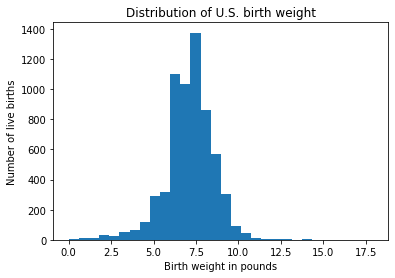

In [32]:
plt.hist(birth_weight.dropna(), bins=30)

plt.xlabel('Birth weight in pounds')
plt.ylabel('Number of live births')
plt.title('Distribution of U.S. birth weight');

Pyplot doesn't work with NaNs, so we have to use `dropna`, which makes a new Series that contains only the valid values.

The second argument, `bins`, tells `hist` to divide the range of weights into 30 intervals, called "bins", and count how many values fall in each bin.

The `x` axis is birth weight in pounds, divided into 30 bins.  The `y` axis is the number of births in each bin.  

The distribution looks a little like a bell curve, but the tail is longer on the left than on the right; that is, there are more light babies than heavy babies.

That makes sense because the distribution includes some babies that were born preterm.  

----
Pyplot不適用於NaN，因此我們必須使用dropna，這將創建一個僅包含有效值的新Series。

第二個參數bins告訴hist將權重範圍劃分為30個間隔，稱為“ bins”，併計算每個bin中有多少個值。

該x軸是在磅出生體重，分成30個二進制位。該y軸是在每個箱出生人數。

分佈看上去有點像鐘形曲線，但是尾巴的長度比左側長。也就是說，輕嬰兒比重嬰兒多。

這是有道理的，因為分佈中包括一些早產兒。

**Exercise:** `hist` takes keyword arguments that specify the type and appearance of the histogram.  Find the documentation of `hist` and see if you can figure out how to plot the histogram as an unfilled line.

----
練習：使用 hist關鍵字參數來指定直方圖的類型和外觀。查找的文檔，hist看看是否可以找出如何將直方圖繪製為未填充的線。


In [33]:
# Solution goes here

**Exercise:** As we saw in a previous exercise, the NSFG dataset includes a column called `agecon` that records age at conception for each pregnancy. 

- Select this column from the DataFrame, divide by 100 to convert it to years, and assign it to a variable called `agecon`.

- Plot the histogram of these values with 20 bins.

- Label the `x` and `y` axes appropriately.

----

練習：正如我們在之前的練習中所看到的那樣，NSFG數據集包括一個名為的列agecon，該列記錄了每次懷孕的受孕年齡。

從DataFrame中選擇此列，除以100可將其轉換為年份，然後將其分配給名為的變量agecon。

用20個bin繪製這些值的直方圖。

適當標記x和y軸。


In [34]:
# Solution goes here

## Boolean series

We have seen that the distribution of birth weights is "skewed to the left"; that is, there are more light babies than heavy ones and they are farther from the mean.

That's because preterm babies tend to be lighter.  The most common duration for pregnancy is 39 weeks, which is "full term"; "preterm" is usually defined to be less than 37 weeks.

To see which babies are preterm, we can use `prglngth`, which records pregnancy length in weeks.

To identify babies that were born preterm, we can compare `prglngth` to 37.

----

布爾序列

我們已經看到出生體重的分佈“偏向左側”；也就是說，輕嬰兒比重嬰兒更多，而且距離中位數還遠。

那是因為早產兒更輕。最常見的懷孕時間是39週，即“足月”。“早產”通常定義為少於37週。

要查看哪些嬰兒早產，我們可以使用prglngth，它記錄以周為單位的懷孕時間。

為了確定早產兒，我們可以將其prglngth與37個嬰兒進行比較。


In [35]:
preterm = (nsfg['prglngth'] < 37)
preterm.dtype

dtype('bool')

When you compare a Series to a value, the result is a Boolean Series; that is, each element is a Boolean value, True or False.  In this case, it's True for each preterm baby and False otherwise.  We can use `head` to see the first 5 elements.

----
將系列與值進行比較時，結果是布爾系列；也就是說，每個元素都是布爾值True或False。在這種情況下，每個早產兒為True，否則為False。我們可以head用來查看前5個元素。


In [36]:
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

If you compute the sum of a Boolean Series, it treats True as 1 and False as 0, so the sum is the number of Trues, which is the number of preterm babies, about 3700.

----

如果您計算布爾序列的總和，它將True視為1，將False視為0，因此總和為Trues的數量，即早產嬰兒的數量，約為3700。


In [37]:
preterm.sum()

3742

If you compute the mean, you get the *fraction* of Trues; in this case, it's close to 0.4; that is, the durations of 40% of the pregnancies are less than 37 weeks.

----

如果您計算平均值，您將獲得True 的分數；在這種情況下，接近0.4；也就是說，40％的懷孕時間少於37週。


In [38]:
preterm.mean()

0.39987176747168196

However, this result might be misleading because it includes all pregnancy outcomes, not just live births.

We can create another Boolean Series to indicate which pregnancies ended in live birth:

----
但是，此結果可能會產生誤導，因為它包括所有懷孕結果，而不僅僅是活產。

我們可以創建另一個布爾系列，以指示哪些妊娠在活產中結束：


In [39]:
live = (nsfg['outcome'] == 1)
live.mean()

0.6934173968796752

Now we can use the logical operator `&` to identify pregnancies where the outcome is a preterm live birth: 

----
現在，我們可以使用邏輯運算符&來識別結果為早產的孕婦：


In [40]:
live_preterm = (live & preterm)
live_preterm.mean()

0.09724300064116265

**Exercise:** Of all live births, what fraction are preterm?

----
練習：在所有活產嬰兒中，早產佔什麼比例？


In [41]:
# Solution goes here

The other common logical operators are:
    
* `|`, which is the OR operator; for example `live | preterm` is true if either `live` is true, or `preterm` is true, or both.

* `~`, which is the NOT operator; for example `~live` is true if `live` is false or NaN.

The logical operators treat NaN the same as False.  So you should be careful about using the NOT operator with a Series that contains NaN values.  

For example, `~preterm` would include full term pregnancies, which is probably what you want, and pregnancies with unknown length, which might not be.

----

其他常見的邏輯運算符是：

|，這是OR運算符；例如live | preterm，如果一個live為true，或者preterm為true，或者兩者都為，則為true。

~，這是NOT運算符；例如~live，如果live為false或NaN，則為true 。

邏輯運算符將NaN與False相同。因此，在將NOT運算符用於包含NaN值的Series時，應格外小心。

例如，~preterm將包括可能是您想要的足月妊娠，以及可能不是的未知長度的懷孕。




**Exercise:** What fraction pregnancies are full term, that is, 37 weeks or more?

Of all live births, what fraction are full term?

----
練習：足月懷孕的比例是多少，即37週或更長時間？

在所有活產中，足月的比例是多少？


In [42]:
# Solution goes here

In [43]:
# Solution goes here

## Filtering

We can use a Boolean Series as a filter; that is, we can select only rows that satisfy a condition or meet some criterion.

For example, we can use `preterm` and the bracket operator to select values from `birth_weight`, so `preterm_weight` gets birth weights for preterm babies. 

----

Filtering 

我們可以使用布爾級數作為過濾器；也就是說，我們只能選擇滿足條件或滿足某些條件的行。

例如，我們可以使用preterm和中括號運算符從中選擇值birth_weight，從而preterm_weight獲得早產兒的出生體重。

In [44]:
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

To select full-term babies, we can create a Boolean Series like this:

----

要選擇足月嬰兒，我們可以創建一個布爾系列，如下所示：

In [45]:
fullterm = (nsfg['prglngth'] >= 37)

And use it to select birth weights for full term babies:

----
並使用它為足月嬰兒選擇出生體重：

In [46]:
full_term_weight = birth_weight[fullterm]
full_term_weight.mean()

7.372323879231473

As expected, full term babies are heavier, on average, than preterm babies.

To be more explicit, we could also limit the results to live births, like this:

----
正如預期的那樣，足月嬰兒平均要比早產嬰兒重。

更明確地說，我們還可以將結果限制為活產，如下所示：

In [47]:
full_term_weight = birth_weight[live & fullterm]
full_term_weight.mean()

7.372323879231473

But in this case it doesn't make a difference because `birth_weight` is only valid for live births.

----
但是在這種情況下，它沒有什麼區別，因為birth_weight僅適用於活產。


**Exercise:** Let's see if there is a difference in weight between single births and multiple births (twins, triplets, etc.).

The variable `nbrnaliv` represents the number of babies born alive from a pregnancy.  Here's a cleaned version of this variable:

----

練習：讓我們看看單胎和多胎（雙胞胎，三胞胎等）之間的體重是否存在差異。

該變量nbrnaliv表示因懷孕而活著的嬰兒數量。這是此變量的清除版本：


In [48]:
nbrnaliv_clean = nsfg['nbrnaliv'].replace(8, np.nan)

Use `nbrnaliv_clean` and `live` to create a Boolean series called `multiple` that is true for multiple live births.  

Of all live births, what fraction are multiple births?

----
使用nbrnaliv_clean和live創建一個布爾序列multiple，該序列對於多個活產都是正確的。

在所有活產中，多胞胎佔什麼比例？

In [49]:
# Solution goes here

In [50]:
# Solution goes here

**Exercise:** Make a Boolean series called `single` that is true for single live births.

Of all single births, what fraction are preterm?

Of all multiple births, what fraction are preterm?

----

練習：創建一個布爾序列single，該序列對於單胎活產是正確的。

在所有單胎中，早產佔什麼比例？

在所有多胞胎中，早產佔什麼比例？


In [51]:
# Solution goes here

In [52]:
# Solution goes here

In [53]:
# Solution goes here

**Exercise:** What is the average birth weight for live, single, full-term births?

----

練習：活產，單身和足月分娩的平均出生體重是多少？


In [54]:
# Solution goes here

## Resampling

We are almost ready to compute the average birth weight, but there's one more thing we have to do: resampling.

The NSFG is not exactly representative of the U.S. population; by design, some groups are more likely to appear in the sample than others; that is, they are "oversampled".  Oversampling helps to ensure that you have enough people in every subgroup to get reliable statistics, but it makes the analysis a little more complicated.

However, we can correct for oversampling by "resampling".  The key is that each pregnancy in the dataset has a "sampling weight" that indicates how many pregnancies it represents.  In the `nsfg` DataFrame, the sampling weight is stored in a column named `wgt2013_2015`.

Here's what it looks like.

----

Resampling 

我們幾乎已經準備好計算平均出生體重，但是我們還要做一件事：重新採樣。

NSFG並不完全代表美國人口；根據設計，某些組比其他組更可能出現在樣本中；也就是說，它們被“過度採樣”。過度採樣有助於確保每個子組中都有足夠的人員來獲取可靠的統計信息，但這會使分析更加複雜。

但是，我們可以通過“重新採樣”來糾正過度採樣。關鍵是數據集中的每個懷孕都有一個“抽樣權重”，以表明它代表多少次懷孕。在nsfgDataFrame中，採樣權重存儲在名為的列中wgt2013_2015。

這是它的樣子。

In [55]:
nsfg['wgt2013_2015'].describe()

count     9358.000000
mean     10759.200147
std      11400.179222
min       1859.105000
25%       4340.053407
50%       7062.994158
75%      12629.322982
max      75399.410000
Name: wgt2013_2015, dtype: float64

The lowest value in this column is about 1859, which means that a pregnancy with that weight represents 1859 total pregnancies in the population.

The highest weight is about 75399, which means that this observed pregnancy represents substantially more pregnancies in the population.

To take these weights into account, we can resample the DataFrame, which means that we draw a new random sample from the rows in the DataFrame using a weighted sampling process so that rows with higher weights are more likely than rows with lower weights.

DataFrame provides a method called `sample` that does what we want:

----
此列中的最低值是大約1859，這意味著該體重的孕婦代表該人群中總共1859的懷孕。

最高體重約為75399，這意味著該觀察到的懷孕代表了人口中更多的懷孕。

為了考慮這些權重，我們可以對DataFrame進行重新採樣，這意味著我們將使用加權採樣過程從DataFrame的行中繪製一個新的隨機樣本，以便權重較高的行比權重較低的行更有可能。

DataFrame提供了一種稱為的方法sample，可以實現我們想要的功能：


In [56]:
n = len(nsfg)
weights = nsfg['wgt2013_2015']
sample = nsfg.sample(n, 
                     replace=True, 
                     weights=weights)

Here's what the arguments mean:

* The size of the sample, `n`, is the same as the size of the DataFrame.

* `replace` means that sampling is done "with replacement", so some rows appear in the sample more than once and some might not appear at all.

* `weights` are used to weight the sampling process, so each rows appears in the sample with frequency proportional to its weight.

----

這是參數的含義：

樣本n的大小與DataFrame的大小相同。

replace 表示採樣是“替換完成”的，因此樣本中的某些行會出現多次，而有些則根本不會出現。

weights 用於對採樣過程進行加權，因此樣本中的每一行出現的頻率均與其權重成正比。


**Exercise:** Now let's bring it all together.  To test your recall, try to do this exercise without referring back to previous code.

1. From `sample`, extract `birthwgt_lb1` and `birthwgt_oz1` and assign them to `pounds` and `ounces`.

2. Clean both variables by replacing `98` and `99` with NaN.

3. Compute total birthweight in pounds and display the mean.

4. Compute Boolean Series for live, single, and full-term babies.

5. Select birthweights for live, single, full-term babies and display their mean weight.

----

練習：現在，讓我們將它們組合在一起。為了測試您的召回率，請嘗試執行此練習而不參考先前的代碼。

從中sample提取birthwgt_lb1並將birthwgt_oz1它們分配給pounds和ounces。

通過替換98和99用NaN 清除兩個變量。

計算以磅為單位的總出生體重，並顯示平均值。

計算活期，單身和足月嬰兒的布爾系列。

為活期，單身和足月嬰兒選擇出生體重，並顯示其平均體重。


In [57]:
# Solution goes here

In [58]:
# Solution goes here

Most of the time, you will find that the resampled data yields a slightly higher estimate for the average birth weight of single, full-term births in the U.S., compared to the unresampled data.

But resampling is a random process, so the results will be slightly different each time you run it.  Later we will see how we can use this variability to quantify the precision of the estimate.

----

在大多數情況下，您會發現，與未抽樣數據相比，重抽樣數據對美國單身，足月出生的平均出生體重的估計值稍高。

但是重採樣是一個隨機過程，因此每次運行時結果都會略有不同。稍後我們將看到如何使用這種可變性來量化估計的精度。
